In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df=sns.load_dataset('taxis')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [4]:
df.dropna(inplace=True)
df.describe(include='object')
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

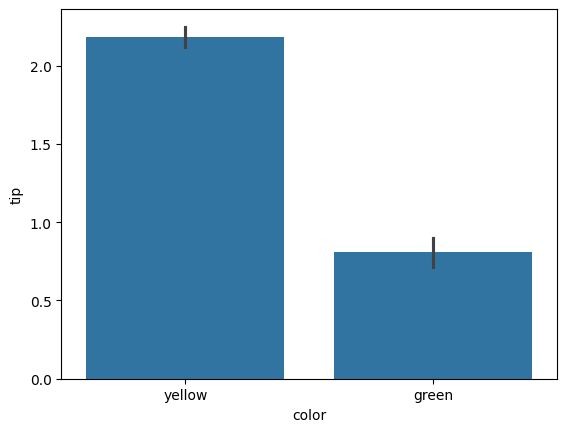

In [5]:
sns.barplot(x=df.color,y=df.tip,estimator='mean')
plt.show()

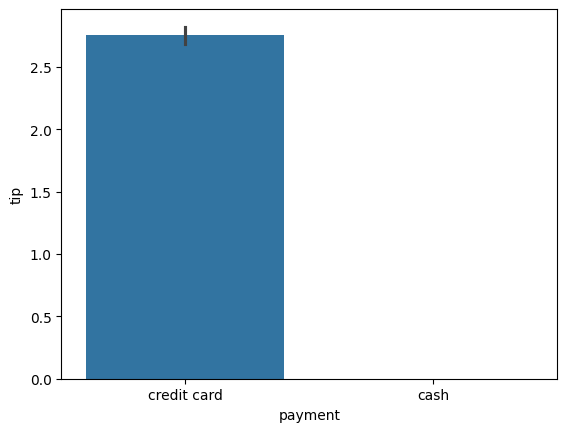

In [6]:
sns.barplot(x=df.payment,y=df.tip,estimator='mean')
plt.show()

In [8]:
# Independent T-Test
green_tip = df[df['color']=='green']['tip']
yellow_tip = df[df['color']=='yellow']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(green_tip, yellow_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Significant income difference by Taxi Color")
else:
    print("Fail to reject null hypothesis: No significant income difference by Taxi Color")

Independent T-Test statistic: -17.05932566128597
P-value: 7.791088119489453e-64
Reject null hypothesis: Significant income difference by Taxi Color


In [ ]:
# Independent T-Test
credit_tip = df[df['payment']=='credit card']['tip']
cash_tip = df[df['payment']=='cash']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Significant income difference by payment Method")
else:
    print("Fail to reject null hypothesis: No significant income difference by payment Method")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: Significant income difference by Taxi Color


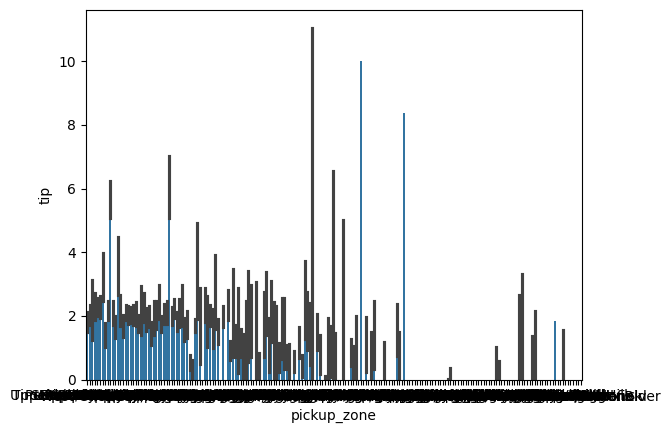

In [12]:
sns.barplot(x=df.pickup_zone,y=df.tip,estimator='mean')
plt.show()

In [13]:

manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
staten_tip=df['tip'][df['dropoff_borough']=='Staten Island']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,staten_tip)
print(f_stat,p_val)

if(p_val<0.05):
  print("Reject null hypothesis: The tip distributions are different for atleast one dropoff_borough")
else:
  print("Fail to reject null hypothesis")

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.05)
print(tukey_result)

# ANOVA Test
regions = [group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
# ANOVA Test
regions = [group['tip'].values for name, group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")





31.42417796696829 5.87859571331583e-26
Reject null hypothesis: The tip distributions are different for atleast one dropoff_borough
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------

In [14]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [16]:
df.corr(numeric_only=True)


,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.005481,-0.000912,0.017838,-0.002885,0.008380
distance,0.005481,1.000000,0.947958,0.476980,0.642333,0.929224
fare,-0.000912,0.947958,1.000000,0.487101,0.617182,0.972311
tip,0.017838,0.476980,0.487101,1.000000,0.414670,0.650677
tolls,-0.002885,0.642333,0.617182,0.414670,1.000000,0.690879
total,0.008380,0.929224,0.972311,0.650677,0.690879,1.000000


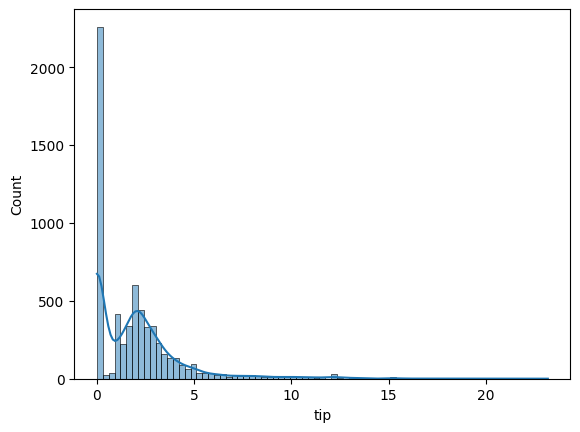

In [17]:
sns.histplot(df['tip'], kde=True)
plt.show()